In [1]:
import tweepy
import numpy as np
import pandas as pd
import datetime, time
import pickle
import matplotlib.pyplot as plt
import re   ## regular expression
import nltk  ##import natural language tool kit
import string
import emoji  ### read emojis
import functools ##comparing emojis
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import operator


###I will talk about lemmatizer vs. stemmer
lemmatizer = WordNetLemmatizer()
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [2]:
data_dir = '../Data/hw4/'

In [3]:
def removeHWA(tweet):
    ###remove initial retweet ats --- Try without this block first to see what's wrong
    RT_pattern = re.compile('^RT @\S+: ')
    if (RT_pattern.match(tweet)):
        tweet = RT_pattern.sub('', tweet)

    ### remove hashtag/weblinks/@/RT
    HWA_pattern = re.compile('(\#\S+)|(http(s)?:\/\/\S+)|(@\S+)')
    m = HWA_pattern.sub('', tweet)
    return m

def remove_punc(tweet):
    punc = '''!()-[]{};:'’"\, <>./?@#$%^&*_~'''
    for ele in tweet: 
        if ele in punc: 
            tweet = tweet.replace(ele, " ") 
    return tweet.lower()

def tokenize(tweet):
    em = tweet
    em_split_emoji = emoji.get_emoji_regexp().split(em)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    return em_split

def remove_stopwords(token_list):
    stopword = nltk.corpus.stopwords.words('english')
    token_list = word_tokenize(token_list)
    text = [word for word in token_list if word not in stopword]  ##keep word only if it is not stopword
    text = [i for i in text if i] ### remove empty strings
    return " ".join(text)

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lem_list = " ".join(lemmatized_sentence)
    lem_list = re.sub(r'\w*\d\w*', '', lem_list).strip() ### remove digits
    return lem_list

def Stemming(token_list):
    lem_list = [ps.stem(word) for word in token_list]
    return lem_list
def Bigram(token_list):
    bigrm = list(nltk.bigrams(token_list.split()))
    wordlist = []
    for i in bigrm:
        if len(i[0]) > 2:
            term = i[0] + '_' + i[1]
            wordlist.append(term)
    return ' '.join(wordlist)

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


In [4]:

#####Choices
#"BestBuy_Tweets.sav"
#"FBI_Tweets.sav"
#"SpaceX_Tweets.sav"
#"KimKardashian_Tweets.sav"
#"KingJames_Tweets.sav"


####Load Trump's Tweet and LBJ's Tweet and put them in 1 datagrame
SpaceX = pickle.load(open(data_dir+"/SpaceX_Tweets.sav", "rb" ))
LBJ = pickle.load(open(data_dir+"/KingJames_Tweets.sav", "rb" ))
BB = pickle.load(open(data_dir+"/BestBuy_Tweets.sav", "rb" ))
KK = pickle.load(open(data_dir+"/KimKardashian_Tweets.sav", "rb" ))
FBI = pickle.load(open(data_dir+"/FBI_Tweets.sav", "rb" ))

In [5]:
###Try out some data pull, see how they look like
LBJ

,id,text,date,hashtags,rt_count,media,ext_media,place,lang,fav_count,source
0,1516121164464066560,@kylekuzma Say less! 🤔,2022-04-18 18:27:08+00:00,,122,,,None,en,3854,Twitter for iPhone
1,1516067058072502276,@kylekuzma 🤣🤣🤣🤣🤣🤣🤣🤣 I mean that show would be ...,2022-04-18 14:52:08+00:00,,334,,,None,en,15833,Twitter for iPhone
2,1515813597275996162,Damn shame he ain’t Top 75! 🤦🏾‍♂️ https://t.co...,2022-04-17 22:04:58+00:00,,3563,,,None,en,36866,Twitter for iPhone
3,1515811158795726852,Young God-rie is so damn good at basketball ma...,2022-04-17 21:55:17+00:00,,6339,,,None,en,87954,Twitter for iPhone
4,1515754467265679361,Facts! Player Development there is damn good!!...,2022-04-17 18:10:01+00:00,,2974,,,None,en,42171,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...
3217,799416136471379978,Humbled. Not a day goes by when I don’t think ...,2016-11-18 00:57:14+00:00,"GOAT, StriveForGreatness",1500,,,None,en,6331,Twitter for Android
3218,798743655997730816,"Regardless of where you come from, these conve...",2016-11-16 04:25:02+00:00,,2372,,,None,en,6475,Twitter for Android
3219,798517037198901248,"RT @clevelanddotcom: ""The Wall,"" a game show p...",2016-11-15 13:24:32+00:00,,167,,,None,en,0,Twitter for Android
3220,798516952297652225,RT @30for30: First Look: @BenSimmons25 dreamed...,2016-11-15 13:24:11+00:00,Becoming,259,photo,video,None,en,0,Twitter for Android


In [6]:
###combine all the dataframe together into 1
SpaceX['Creator'] = 'SpaceX'
LBJ['Creator'] = 'LBJ'
BB['Creator'] = 'BB'
KK['Creator'] = 'KK'
FBI['Creator'] = 'FBI'
combined = pd.concat([SpaceX,LBJ,BB,KK,FBI], ignore_index=True)


In [7]:
combined

,id,text,date,hashtags,rt_count,media,ext_media,place,lang,fav_count,source,Creator
0,1516152868826501129,"RT @Space_Station: Due to unfavorable weather,...",2022-04-18 20:33:07+00:00,Ax1,193,,,None,en,0,Twitter Web App,SpaceX
1,1515682228172296196,Falcon 9’s first stage has landed https://t.co...,2022-04-17 13:22:57+00:00,,6158,photo,video,None,en,64096,Twitter Media Studio - LiveCut,SpaceX
2,1515680510193799168,Main engine cutoff and stage separation confirmed,2022-04-17 13:16:08+00:00,,416,,,None,en,8576,Twitter Web App,SpaceX
3,1515680155913515013,Liftoff! https://t.co/b8ZCn4z61E,2022-04-17 13:14:43+00:00,,1681,photo,video,None,en,16670,Twitter Media Studio - LiveCut,SpaceX
4,1515676699584720904,Watch Falcon 9 launch NROL-85 → https://t.co/s...,2022-04-17 13:00:59+00:00,,798,,,None,en,5382,Twitter Media Studio,SpaceX
...,...,...,...,...,...,...,...,...,...,...,...,...
16204,1239687982426324992,Are you looking for accurate and up-to-date in...,2020-03-16 23:00:21+00:00,COVID19,137,photo,photo,None,en,344,Hootsuite Inc.,FBI
16205,1239582283998388226,Public corruption—one of the FBI’s top investi...,2020-03-16 16:00:21+00:00,,134,,,None,en,429,Hootsuite Inc.,FBI
16206,1239491752224047105,The #FBI honors Special Agent Robert Martin Ro...,2020-03-16 10:00:37+00:00,"FBI, OTD, September11, WallofHonor",96,photo,photo,None,en,476,Hootsuite Inc.,FBI
16207,1239333104495529984,Watch out for emails claiming to be from the @...,2020-03-15 23:30:12+00:00,COVID19,681,photo,photo,None,en,806,Hootsuite Inc.,FBI


In [8]:
###Common Tags
### if there is an FBI tag, then likely the tweet is from FBI
ht = combined[combined['hashtags']!=''].groupby(['Creator'])
top_hash = ht.hashtags.value_counts()
top_hash_df = top_hash.to_frame()
top_hash_df[top_hash_df['hashtags'] > 20]

hashtags
Creator hashtags                          
FBI     FBI                            710
        FBI, OTD, WallofHonor           94
        COVID19                         55
        ICYMI, FBI                      38
        FBI, SeekingInfoSaturday        33
        ICYMI                           32
        FBI, NatSec                     29
        NatSec                          24
        DYK, FBI                        23
        FBI, cyber                      23
        ProjectSafeChildhood            21
KK      KUWTK                          174
        KardashianKloset                64
        KKWBEAUTY                       29
        TheKardashians                  28
LBJ     StriveForGreatness              39
        TheShopHBO                      27
        JamesGang                       26
        IPROMISE                        24
        WeAreFamily                     24
        Browns                          21
SpaceX  Dragon                          72

In [9]:
##Seems like media is just media vs. no media
combined['media'].value_counts()

         10923
photo     5286
Name: media, dtype: int64

In [10]:
### ext_media goes out in detail on what extra media was used, seems like it is photo (multiple), video, animnated_gif
combined['ext_media'].value_counts()

                              10923
photo                          3028
video                           961
photo, photo                    563
photo, photo, photo             361
photo, photo, photo, photo      208
animated_gif                    165
Name: ext_media, dtype: int64

In [11]:
com = combined.groupby(['Creator'])
com.date.describe()
##BB has highest frequency, spaceX has lowest frequency

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/groupby/generic.py:675: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/groupby/generic.py:675: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/groupby/generic.py:675: FutureWarning: Treating datetime data as categorical rat

,count,unique,top,freq,first,last
Creator,,,,,,
BB,3250,3248,2022-04-13 18:28:11+00:00,2,2021-07-28 16:08:06+00:00,2022-04-18 18:54:16+00:00
FBI,3249,3140,2020-07-21 17:15:09+00:00,4,2020-03-15 16:00:35+00:00,2022-04-18 16:01:25+00:00
KK,3238,3169,2020-12-11 03:11:45+00:00,6,2020-04-28 03:47:11+00:00,2022-04-18 16:03:45+00:00
LBJ,3222,3217,2020-05-06 22:06:33+00:00,2,2016-11-14 00:43:43+00:00,2022-04-18 18:27:08+00:00
SpaceX,3250,3222,2021-02-16 03:48:27+00:00,3,2015-03-02 03:53:27+00:00,2022-04-18 20:33:07+00:00


In [12]:
combined.groupby(['Creator', 'source']).id.count()

Creator  source                        
BB       Khoros CX                         2992
         Khoros Publishing                   10
         Twitter Ads                          2
         Twitter Web App                    147
         Twitter for Advertisers             89
         Twitter for Advertisers.             7
         Twitter for iPhone                   3
FBI      Hootsuite Inc.                    2224
         Sprout Social                      207
         Twitter Media Studio                64
         Twitter Web App                    754
KK       Twitter Web App                     26
         Twitter for Mac                     25
         Twitter for iPhone                3187
LBJ      Twitter Web App                      4
         Twitter for Android                113
         Twitter for iPhone                3105
SpaceX   Periscope                            1
         TweetDeck                          135
         Twitter Media Studio               162


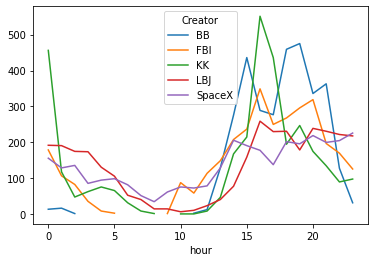

In [13]:
###hour is not a good feature, as all 5 accounts seems to follow similar patterns
### These are already eastern time as tweepy automatically convert to local timezone
combined['hour'] = combined.date.dt.hour
hourly = pd.pivot_table(combined, values='id', index=['hour'],
                    columns=['Creator'], aggfunc='count')
hourly.plot.line()

# Features from actual Text

In [14]:
##Add additional features to dataframe
###Is this a retweet?
def rtCheck(tweet):
    ###remove initial retweet ats --- Try without this block first to see what's wrong
    RT_pattern = re.compile('^RT @\S+: ')
    if (RT_pattern.search(tweet)):
        return True
    else:
        return False

combined['RT'] = combined['text'].apply(rtCheck)
combined

,id,text,date,hashtags,rt_count,media,ext_media,place,lang,fav_count,source,Creator,hour,RT
0,1516152868826501129,"RT @Space_Station: Due to unfavorable weather,...",2022-04-18 20:33:07+00:00,Ax1,193,,,None,en,0,Twitter Web App,SpaceX,20,True
1,1515682228172296196,Falcon 9’s first stage has landed https://t.co...,2022-04-17 13:22:57+00:00,,6158,photo,video,None,en,64096,Twitter Media Studio - LiveCut,SpaceX,13,False
2,1515680510193799168,Main engine cutoff and stage separation confirmed,2022-04-17 13:16:08+00:00,,416,,,None,en,8576,Twitter Web App,SpaceX,13,False
3,1515680155913515013,Liftoff! https://t.co/b8ZCn4z61E,2022-04-17 13:14:43+00:00,,1681,photo,video,None,en,16670,Twitter Media Studio - LiveCut,SpaceX,13,False
4,1515676699584720904,Watch Falcon 9 launch NROL-85 → https://t.co/s...,2022-04-17 13:00:59+00:00,,798,,,None,en,5382,Twitter Media Studio,SpaceX,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,1239687982426324992,Are you looking for accurate and up-to-date in...,2020-03-16 23:00:21+00:00,COVID19,137,photo,photo,None,en,344,Hootsuite Inc.,FBI,23,False
16205,1239582283998388226,Public corruption—one of the FBI’s top investi...,2020-03-16 16:00:21+00:00,,134,,,None,en,429,Hootsuite Inc.,FBI,16,False
16206,1239491752224047105,The #FBI honors Special Agent Robert Martin Ro...,2020-03-16 10:00:37+00:00,"FBI, OTD, September11, WallofHonor",96,photo,photo,None,en,476,Hootsuite Inc.,FBI,10,False
16207,1239333104495529984,Watch out for emails claiming to be from the @...,2020-03-15 23:30:12+00:00,COVID19,681,photo,photo,None,en,806,Hootsuite Inc.,FBI,23,False


In [15]:
### Maybe useful, as if it is RT, very less likely it came from BestBuy
combined.groupby(['Creator', 'RT']).count()['id']

Creator  RT   
BB       False    3223
         True       27
FBI      False    3037
         True      212
KK       False    2517
         True      721
LBJ      False    2484
         True      738
SpaceX   False    2702
         True      548
Name: id, dtype: int64

In [16]:
def mention_func(tweet):
    ###remove initial retweet ats --- Try without this block first to see what's wrong
    m_pattern = re.compile('@\w+')
    m = m_pattern.findall(tweet)
    m = sorted(list(set(m)))
    m = [each_string.lower() for each_string in m]
    m = ' '.join(m)
    
    return m


#### Maybe useful as if there is @FBI, then mostlikely it is for FBI
combined['Mention'] = combined['text'].apply(mention_func)
mention = combined.groupby(['Creator', 'Mention']).id.count()
mention[mention >20]

Creator  Mention                     
BB                                        219
         @edwardissocool                   30
         @jkline120                        25
FBI                                      1965
         @cisagov                          65
         @fbialbuquerque                   25
         @fbiboston                        24
         @fbimostwanted                    24
         @fbiwfo                           78
         @newyorkfbi                       25
         @thejusticedept                   74
         @usagov                           46
KK                                       1647
         @asyakardashian                   36
         @kkwbeauty                       119
         @kkwfragrance                    110
         @kkwmafia @skims                  42
         @narcicismo                       39
         @skims                           273
LBJ                                      1469
         @blazepizza                      

In [17]:
###These are the top mentions, seems like they do help tell who is the poster (e.g., fbiwfo is prob from fbi)
combined['Mention'].value_counts()[1:11]

@space_station     312
@skims             273
@elonmusk          152
@kkwbeauty         119
@kkwfragrance      110
@fbiwfo             78
@thejusticedept     74
@ipromiseschool     73
@nasa               71
@cisagov            65
Name: Mention, dtype: int64

# Cleaning Text

In [18]:
###Let's get clean text from Tweets
text = combined[['id','Creator', 'text']]
text

,id,Creator,text
0,1516152868826501129,SpaceX,"RT @Space_Station: Due to unfavorable weather,..."
1,1515682228172296196,SpaceX,Falcon 9’s first stage has landed https://t.co...
2,1515680510193799168,SpaceX,Main engine cutoff and stage separation confirmed
3,1515680155913515013,SpaceX,Liftoff! https://t.co/b8ZCn4z61E
4,1515676699584720904,SpaceX,Watch Falcon 9 launch NROL-85 → https://t.co/s...
...,...,...,...
16204,1239687982426324992,FBI,Are you looking for accurate and up-to-date in...
16205,1239582283998388226,FBI,Public corruption—one of the FBI’s top investi...
16206,1239491752224047105,FBI,The #FBI honors Special Agent Robert Martin Ro...
16207,1239333104495529984,FBI,Watch out for emails claiming to be from the @...


In [19]:
pd.set_option('display.max_colwidth', None)

In [20]:
####Do cleaning on the text, remove hashtag, at, retweet, etc. break items into tokens, then lemitized token
###Run sudo python -m nltk.downloader -d /usr/local/share/nltk_data all if you haven't used language package
text['noHWA_text'] = text['text'].apply(removeHWA)
text['remove_Punc'] = text['noHWA_text'].apply(remove_punc)
text['Lem_Token'] = text['remove_Punc'].apply(lemmatize_sentence)
text['no_stopword'] = text['Lem_Token'].apply(remove_stopwords)

### You may do bigram based on no_stopword, lem_token or stem token
text['Bigram'] = text['no_stopword'].apply(Bigram)

###Reset Index
text.reset_index(drop=True, inplace=True)
text

<ipython-input-20-398efc62d883>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['noHWA_text'] = text['text'].apply(removeHWA)
<ipython-input-20-398efc62d883>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['remove_Punc'] = text['noHWA_text'].apply(remove_punc)
<ipython-input-20-398efc62d883>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,id,Creator,text,noHWA_text,remove_Punc,Lem_Token,no_stopword,Bigram
0,1516152868826501129,SpaceX,"RT @Space_Station: Due to unfavorable weather, the undocking of Axiom Mission 1 (#Ax1) has been postponed. Weather permitting, the four-mem…","Due to unfavorable weather, the undocking of Axiom Mission 1 ( has been postponed. Weather permitting, the four-mem…",due to unfavorable weather the undocking of axiom mission 1 has been postponed weather permitting the four mem…,due to unfavorable weather the undocking of axiom mission have be postpone weather permit the four mem…,due unfavorable weather undocking axiom mission postpone weather permit four mem…,due_unfavorable unfavorable_weather weather_undocking undocking_axiom axiom_mission mission_postpone postpone_weather weather_permit permit_four four_mem…
1,1515682228172296196,SpaceX,Falcon 9’s first stage has landed https://t.co/76VIqs22Dx,Falcon 9’s first stage has landed,falcon 9 s first stage has landed,falcon s first stage have land,falcon first stage land,falcon_first first_stage stage_land
2,1515680510193799168,SpaceX,Main engine cutoff and stage separation confirmed,Main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirm,main engine cutoff stage separation confirm,main_engine engine_cutoff cutoff_stage stage_separation separation_confirm
3,1515680155913515013,SpaceX,Liftoff! https://t.co/b8ZCn4z61E,Liftoff!,liftoff,liftoff,liftoff,
4,1515676699584720904,SpaceX,Watch Falcon 9 launch NROL-85 → https://t.co/sHZKdDacjG https://t.co/a9zuvHM5At,Watch Falcon 9 launch NROL-85 →,watch falcon 9 launch nrol 85 →,watch falcon launch nrol →,watch falcon launch nrol →,watch_falcon falcon_launch launch_nrol nrol_→
...,...,...,...,...,...,...,...,...
16204,1239687982426324992,FBI,"Are you looking for accurate and up-to-date information about #COVID19? For updates, follow our trusted partners @CDCgov, @FTC, and @US_FDA, and go to https://t.co/4j2NXYFjCD. https://t.co/JsorE864tQ","Are you looking for accurate and up-to-date information about For updates, follow our trusted partners and and go to",are you looking for accurate and up to date information about for updates follow our trusted partners and and go to,be you look for accurate and up to date information about for update follow our trusted partner and and go to,look accurate date information update follow trusted partner go,look_accurate accurate_date date_information information_update update_follow follow_trusted trusted_partner partner_go
16205,1239582283998388226,FBI,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an @FBIStLouis investigation. Read more at https://t.co/GlFJ07GpeH.,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation. Read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerated a missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerate a missouri county executive who illegally steer government fund to his political donor have be sentence as a result of an investigation read more at,public corruption—one fbi top investigative priorities—will tolerate missouri county executive illegally steer government fund political donor sentence result investigation read,public_corruption—one corruption—one_fbi fbi_top top_investigative investigative_priorities—will priorities—will_tolerate tolerate_missouri missouri_county county_executive executive_illegally illegally_steer steer_governme

In [21]:
text[text['Creator']=='FBI']

,id,Creator,text,noHWA_text,remove_Punc,Lem_Token,no_stopword,Bigram
12960,1516084492116668420,FBI,"The #FBI remembers Special Agent Richard P. Horan, who was shot and killed #OTD in 1957 during an effort to apprehend a wanted fugitive. #WallOfHonor https://t.co/QF5ZTUTkDV https://t.co/XdHzQ8ifed","The remembers Special Agent Richard P. Horan, who was shot and killed in 1957 during an effort to apprehend a wanted fugitive.",the remembers special agent richard p horan who was shot and killed in 1957 during an effort to apprehend a wanted fugitive,the remembers special agent richard p horan who be shoot and kill in during an effort to apprehend a wanted fugitive,remembers special agent richard p horan shoot kill effort apprehend wanted fugitive,remembers_special special_agent agent_richard richard_p horan_shoot shoot_kill kill_effort effort_apprehend apprehend_wanted wanted_fugitive
12961,1516054133190574091,FBI,"On January 6, 2021, the person in these photos allegedly assaulted law enforcement personnel at the U.S. Capitol. Now, the #FBI needs your help to identify them. Dial 1-800-CALL-FBI or visit https://t.co/iL7sD5efWD to submit a tip. Refer to photo 527 when you do. https://t.co/LW0CO8T3wx","On January 6, 2021, the person in these photos allegedly assaulted law enforcement personnel at the U.S. Capitol. Now, the needs your help to identify them. Dial 1-800-CALL-FBI or visit to submit a tip. Refer to photo 527 when you do.",on january 6 2021 the person in these photos allegedly assaulted law enforcement personnel at the u s capitol now the needs your help to identify them dial 1 800 call fbi or visit to submit a tip refer to photo 527 when you do,on january the person in these photo allegedly assault law enforcement personnel at the u s capitol now the need your help to identify them dial call fbi or visit to submit a tip refer to photo when you do,january person photo allegedly assault law enforcement personnel u capitol need help identify dial call fbi visit submit tip refer photo,january_person person_photo photo_allegedly allegedly_assault assault_law law_enforcement enforcement_personnel personnel_u capitol_need need_help help_identify identify_dial dial_call call_fbi fbi_visit visit_submit submit_tip tip_refer refer_photo
12962,1515993670943653888,FBI,"The #FBI honors Special Agent James K. McAllister, who died #OTD in 1986 after falling from a helicopter during a training exercise at the FBI Academy. McAllister was an original member of the Bureau's Hostage Rescue Team. #WallOfHonor https://t.co/fDuKRaSewT https://t.co/wimzUYaqTW","The honors Special Agent James K. McAllister, who died in 1986 after falling from a helicopter during a training exercise at the FBI Academy. McAllister was an original member of the Bureau's Hostage Rescue Team.",the honors special agent james k mcallister who died in 1986 after falling from a helicopter during a training exercise at the fbi academy mcallister was an original member of the bureau s hostage rescue team,the honor special agent james k mcallister who die in after fall from a helicopter during a training exercise at the fbi academy mcallister be an original member of the bureau s hostage rescue team,honor special agent james k mcallister die fall helicopter training exercise fbi academy mcallister original member bureau hostage rescue team,honor_special special_agent agent_james james_k mcallister_die die_fall fall_helicopter helicopter_training training_exercise exercise_fbi fbi_academy academy_mcallister mcallister_original original_member member_bureau bureau_hostage hostage_rescue rescue_team
12963,1515782196103192581,FBI,"The #FBI needs your help to identify the man in these photos. He allegedly attacked law enforcement personnel at the U.S. Capitol on January 6, 2021. Visit https://t.co/iL7sD5efWD or dial 1-800-CALL-FBI to share tips with us. Refer to photo 526. https://t.co/z3exWP5AwL","The needs your help to identify the man in these photos. He allegedly attacked law 

# Vectorize Data


In [22]:
###we need to convert data into something ML can understand

### 1. Vectorize Data, load countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(text['no_stopword'])
print(X_counts.shape) #how many words there are 
print(count_vect.get_feature_names()) ###all words that are used 

(16209, 11214)
['aaaaaaa', 'aaahhhhhhhhh', 'aaliyah', 'aapi', 'aaron', 'ab', 'abandon', 'abbate', 'abbett', 'abc', 'abdel', 'abduct', 'abduction', 'abductor', 'abdul', 'abdulmutallab', 'abide', 'ability', 'able', 'abo', 'aboard', 'abolish', 'abort', 'about', 'abram', 'abrate', 'abroad', 'abs', 'absolute', 'absolutely', 'absorbs', 'absurd', 'abu', 'abundance', 'abuse', 'abuser', 'abusive', 'abusrour', 'abwehr', 'ac', 'academia', 'academic', 'academies', 'academy', 'accelerate', 'acceleration', 'accent', 'accentuate', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepts', 'access', 'accessibility', 'accessible', 'accessories', 'accessorize', 'accessory', 'accident', 'accidental', 'accidentally', 'accommodate', 'accompany', 'accomplish', 'accomplishment', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'accountant', 'accounting', 'accreditation', 'accumulate', 'accuracy', 'accurate', 'accuse', 'ace', 'achiev', 'achieve', 'achievement', 'acosta', 'acoustic', 'acq

In [23]:
###Let's take a look on how it looks like in dataframe
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,11204,11205,11206,11207,11208,11209,11210,11211,11212,11213
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
####Show column names with actual words
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

,aaaaaaa,aaahhhhhhhhh,aaliyah,aapi,aaron,ab,abandon,abbate,abbett,abc,...,эффективным,является,әɘɘʞ,ⴇauϙƨ,五名人士为中国秘密警察跟踪,搜集美国居民情报遭多项指控,骚扰,𝐋𝐢𝐧𝐤,𝐛𝐢𝐨,𝐢𝐧
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_counts_df[X_counts_df['эффективным']>0]

,aaaaaaa,aaahhhhhhhhh,aaliyah,aapi,aaron,ab,abandon,abbate,abbett,abc,...,эффективным,является,әɘɘʞ,ⴇauϙƨ,五名人士为中国秘密警察跟踪,搜集美国居民情报遭多项指控,骚扰,𝐋𝐢𝐧𝐤,𝐛𝐢𝐨,𝐢𝐧
13243,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [26]:
combined.iloc[13243]

id                                                                                                                                    1499434389859708934
text         RT @FBIWFO: Информация, предоставляемая ФБР населением, является наиболее эффективным средством борьбы с угрозами. Если вы располагаете инф…
date                                                                                                                            2022-03-03 17:19:51+00:00
hashtags                                                                                                                                                 
rt_count                                                                                                                                              158
media                                                                                                                                                    
ext_media                                                                   

In [27]:
X_counts_df.iloc[13500].sort_values(ascending=False).head(30)


fbi           2
attack        2
ugoretz       1
tell          1
expert        1
jeff          1
division      1
day           1
respond       1
director      1
help          1
cyber         1
tonya         1
assistant     1
every         1
ransomware    1
recently      1
pegues        1
victim        1
report        1
deputy        1
partner       1
final         0
fivehands     0
fl            0
fizz          0
fizdale       0
fiz           0
fix           0
figure        0
Name: 13500, dtype: int64

In [28]:
X_counts_df.sum().sort_values(ascending=False).head(30)

launch         1449
falcon          966
help            834
new             809
go              782
dragon          781
tip             759
first           694
get             664
fbi             659
stage           647
today           622
love            621
day             594
year            584
one             576
man             538
visit           529
live            504
amp             500
time            485
work            481
us              474
information     471
see             467
good            465
know            465
learn           464
mission         459
make            443
dtype: int64

In [29]:
####remove columns that has less than 10 appearance
X_counts_df = X_counts_df.drop([col for col, val in X_counts_df.sum().iteritems() if val < 10], axis=1)

In [30]:
### out of ~12000 words, only ~2000 feature extracted
X_counts_df.shape

(16209, 2080)

In [31]:
bi_count_vect = CountVectorizer()
bi_X_counts = bi_count_vect.fit_transform(text['Bigram'])
print(bi_X_counts.shape) #how many words there are 
print(bi_count_vect.get_feature_names()) ###all words that are used 



(16209, 73642)
['_account', '_adversity', '_always', '_amaze', '_amazing', '_ambassador', '_amp', '_andy', '_another', '_appreciate', '_asst', '_astronauts', '_august', '_authenticity', '_available', '_awesome', '_bad', '_bag', '_bankreau', '_beat', '_beautiful', '_best', '_bet', '_beware', '_beyond', '_big', '_billion', '_birthday', '_boy', '_boys', '_bring', '_bro', '_brother', '_build', '_bully', '_call', '_caption', '_capture', '_check', '_cmon', '_come', '_congrats', '_congratulation', '_continue', '_crazy', '_crew', '_damn', '_deadline', '_definitely', '_delegation', '_disney', '_disrespect', '_dog', '_droneships', '_drop', '_easy', '_email', '_end', '_especially', '_etc', '_even', '_every', '_everything', '_exactly', '_excited', '_fact', '_family', '_federal', '_feel', '_fftb', '_filay', '_find', '_first', '_foot', '_foundation', '_fresh', '_full', '_future', '_g', '_game', '_gaming', '_geek', '_gem', '_get', '_girl', '_go', '_good', '_great', '_guy', '_happiness', '_happy', '_h

In [32]:
###Let's take a look on how it looks like in dataframe
bi_X_counts_df = pd.DataFrame(bi_X_counts.toarray())
bi_X_counts_df.columns = bi_count_vect.get_feature_names()
###Top 10 bigrams
bi_X_counts_df.sum().sort_values(ascending=False).head(30)

falcon_launch         392
submit_tip            370
second_stage          274
law_enforcement       246
first_stage           240
special_agent         234
capitol_january       218
stage_engine          175
crew_dragon           161
falcon_first          159
launch_starlink       153
starlink_satellite    150
happy_birthday        145
violence_u            133
engine_cutoff         129
static_fire           122
refer_photo           112
live_                 107
visit_learn           105
help_identify         103
help_us               102
visit_submit          100
stage_land             97
fire_test              97
best_buy               96
minute_liftoff         95
webcast_go             95
photo_tip              92
live_minute            91
separation_confirm     87
dtype: int64

In [33]:
####remove columns that has less than 10 appearance
bi_X_counts_df = bi_X_counts_df.drop([col for col, val in bi_X_counts_df.sum().iteritems() if val < 10], axis=1)
droplist = [i for i in bi_X_counts_df.columns if "_" not in i]
bi_X_counts_df = bi_X_counts_df.drop(droplist,axis=1)

In [34]:
bi_X_counts_df.shape

(16209, 1092)

In [35]:
##where as "buy" may not mean much, but "best_buy" prob stands for bestbuy and special agent is from FBI
bi_X_counts_df.sum().sort_values(ascending=False).head(50)

falcon_launch            392
submit_tip               370
second_stage             274
law_enforcement          246
first_stage              240
special_agent            234
capitol_january          218
stage_engine             175
crew_dragon              161
falcon_first             159
launch_starlink          153
starlink_satellite       150
happy_birthday           145
violence_u               133
engine_cutoff            129
static_fire              122
refer_photo              112
live_                    107
visit_learn              105
help_identify            103
help_us                  102
visit_submit             100
fire_test                 97
stage_land                97
best_buy                  96
webcast_go                95
minute_liftoff            95
photo_tip                 92
live_minute               91
christopher_wray          87
separation_confirm        87
director_christopher      87
seek_information          82
liftoff_                  82
help_find     

In [36]:
mention_count_vect = CountVectorizer()
mention_X_counts = mention_count_vect.fit_transform(combined['Mention'])  
print(mention_X_counts.shape) #how many words there are 
print(mention_count_vect.get_feature_names()) ###all words that are used 

(16209, 3984)
['0725julian', '0fficialsosa02', '0x_flea', '100kompleksound', '1020barnes', '1226_andrew', '14sugar', '1974bornfree', '1awesomelody', '1nonlyfallguy', '1peas', '1sashs4n', '1skrtszn', '2027sound', '210darryl', '216711af6da84c4', '24_g_man', '24hrlu', '27mimi3lbj6', '2alien4earth', '2chainz', '2k', '30for30', '313mannyharris', '33sammi32', '3blackdot', '3picraft', '3rdhourtoday', '45thspacewing', '4for4phillyguy', '52mack_', '6thgrademustach', '71412evl', '75denny', '7eventhplays', '7town3', '8020siren', '81smallz', '824vino', '866ourvote', '87flojo', '88jstall', '8bit_danny', '98stackz', '_3shades', '__stev_', '_aaimnr', '_ajawilson22', '_awaples', '_blg94', '_bryan_young', '_cee1', '_charlie_144', '_cx2_', '_dreamhouse_', '_grogu', '_ivyquinn', '_jakeraa', '_jamesplaysx', '_jasonhg', '_jolie_dame', '_kingwhit', '_malaysianash', '_mariasalas_', '_noahelijah', '_relentless__', '_rocknrobin_', '_ruff_neck', '_sayheykid', '_simplee_her', '_sjpeace_', '_sofixv', '_switchbtch

In [37]:
mention_X_counts_df = pd.DataFrame(mention_X_counts.toarray())
mention_X_counts_df.columns = mention_count_vect.get_feature_names()
###Top 10 mention
mention_X_counts_df.sum().sort_values(ascending=False).head(20)

space_station      491
skims              414
nasa               274
spacex             240
kkwfragrance       196
kingjames          194
elonmusk           186
kkwbeauty          185
kimkardashian      171
uninterrupted      169
fbiwfo             164
ipromiseschool     151
ljfamfoundation    133
thejusticedept     119
cisagov            102
inspiration4x       64
kkwmafia            60
commercial_crew     56
usagov              55
morethanavote       53
dtype: int64

In [38]:
###probably only kim kardashian will mention kkwbeauty
mention_X_counts_df = mention_X_counts_df.drop([col for col, val in mention_X_counts_df.sum().iteritems() if val < 20], axis=1)
mention_X_counts_df.columns = ['men_' + str(col) for col in mention_X_counts_df.columns]
mention_X_counts_df

,men_astro_doug,men_astrobehnken,men_asyakardashian,men_axiom_space,men_bbynews,men_blazepizza,men_cisagov,men_commercial_crew,men_cuffsthelegend,men_djmeel,...,men_skims,men_slamonline,men_space_station,men_spacejammovie,men_spacex,men_springhillent,men_thejusticedept,men_thespringhillco,men_uninterrupted,men_usagov
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Add Additional Features

In [39]:
####Text word count
text['Word_Count'] = text['noHWA_text'].apply(lambda x: len(x.split()))
text

<ipython-input-39-12a3d0110c82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Word_Count'] = text['noHWA_text'].apply(lambda x: len(x.split()))


,id,Creator,text,noHWA_text,remove_Punc,Lem_Token,no_stopword,Bigram,Word_Count
0,1516152868826501129,SpaceX,"RT @Space_Station: Due to unfavorable weather, the undocking of Axiom Mission 1 (#Ax1) has been postponed. Weather permitting, the four-mem…","Due to unfavorable weather, the undocking of Axiom Mission 1 ( has been postponed. Weather permitting, the four-mem…",due to unfavorable weather the undocking of axiom mission 1 has been postponed weather permitting the four mem…,due to unfavorable weather the undocking of axiom mission have be postpone weather permit the four mem…,due unfavorable weather undocking axiom mission postpone weather permit four mem…,due_unfavorable unfavorable_weather weather_undocking undocking_axiom axiom_mission mission_postpone postpone_weather weather_permit permit_four four_mem…,18
1,1515682228172296196,SpaceX,Falcon 9’s first stage has landed https://t.co/76VIqs22Dx,Falcon 9’s first stage has landed,falcon 9 s first stage has landed,falcon s first stage have land,falcon first stage land,falcon_first first_stage stage_land,6
2,1515680510193799168,SpaceX,Main engine cutoff and stage separation confirmed,Main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirm,main engine cutoff stage separation confirm,main_engine engine_cutoff cutoff_stage stage_separation separation_confirm,7
3,1515680155913515013,SpaceX,Liftoff! https://t.co/b8ZCn4z61E,Liftoff!,liftoff,liftoff,liftoff,,1
4,1515676699584720904,SpaceX,Watch Falcon 9 launch NROL-85 → https://t.co/sHZKdDacjG https://t.co/a9zuvHM5At,Watch Falcon 9 launch NROL-85 →,watch falcon 9 launch nrol 85 →,watch falcon launch nrol →,watch falcon launch nrol →,watch_falcon falcon_launch launch_nrol nrol_→,6
...,...,...,...,...,...,...,...,...,...
16204,1239687982426324992,FBI,"Are you looking for accurate and up-to-date information about #COVID19? For updates, follow our trusted partners @CDCgov, @FTC, and @US_FDA, and go to https://t.co/4j2NXYFjCD. https://t.co/JsorE864tQ","Are you looking for accurate and up-to-date information about For updates, follow our trusted partners and and go to",are you looking for accurate and up to date information about for updates follow our trusted partners and and go to,be you look for accurate and up to date information about for update follow our trusted partner and and go to,look accurate date information update follow trusted partner go,look_accurate accurate_date date_information information_update update_follow follow_trusted trusted_partner partner_go,19
16205,1239582283998388226,FBI,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an @FBIStLouis investigation. Read more at https://t.co/GlFJ07GpeH.,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation. Read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerated a missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerate a missouri county executive who illegally steer government fund to his political donor have be sentence as a result of an investigation read more at,public corruption—one fbi top investigative priorities—will tolerate missouri county executive illegally steer government fund political donor sentence result investigation read,public_corruption—one corruption—one_fbi fbi_top top_investigative investigative_priorities—will priorities—will_tolerate tolerate_missouri missouri_county county_executive executive_illegally i

In [40]:
###Punctuation to text ratio
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/((len(text) - text.count(" "))+1),2)

text['Punc_perc'] = text['noHWA_text'].apply(lambda x: count_punct(x))
text

<ipython-input-40-bbb411e1f3f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Punc_perc'] = text['noHWA_text'].apply(lambda x: count_punct(x))


,id,Creator,text,noHWA_text,remove_Punc,Lem_Token,no_stopword,Bigram,Word_Count,Punc_perc
0,1516152868826501129,SpaceX,"RT @Space_Station: Due to unfavorable weather, the undocking of Axiom Mission 1 (#Ax1) has been postponed. Weather permitting, the four-mem…","Due to unfavorable weather, the undocking of Axiom Mission 1 ( has been postponed. Weather permitting, the four-mem…",due to unfavorable weather the undocking of axiom mission 1 has been postponed weather permitting the four mem…,due to unfavorable weather the undocking of axiom mission have be postpone weather permit the four mem…,due unfavorable weather undocking axiom mission postpone weather permit four mem…,due_unfavorable unfavorable_weather weather_undocking undocking_axiom axiom_mission mission_postpone postpone_weather weather_permit permit_four four_mem…,18,0.05
1,1515682228172296196,SpaceX,Falcon 9’s first stage has landed https://t.co/76VIqs22Dx,Falcon 9’s first stage has landed,falcon 9 s first stage has landed,falcon s first stage have land,falcon first stage land,falcon_first first_stage stage_land,6,0.00
2,1515680510193799168,SpaceX,Main engine cutoff and stage separation confirmed,Main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirm,main engine cutoff stage separation confirm,main_engine engine_cutoff cutoff_stage stage_separation separation_confirm,7,0.00
3,1515680155913515013,SpaceX,Liftoff! https://t.co/b8ZCn4z61E,Liftoff!,liftoff,liftoff,liftoff,,1,0.11
4,1515676699584720904,SpaceX,Watch Falcon 9 launch NROL-85 → https://t.co/sHZKdDacjG https://t.co/a9zuvHM5At,Watch Falcon 9 launch NROL-85 →,watch falcon 9 launch nrol 85 →,watch falcon launch nrol →,watch falcon launch nrol →,watch_falcon falcon_launch launch_nrol nrol_→,6,0.04
...,...,...,...,...,...,...,...,...,...,...
16204,1239687982426324992,FBI,"Are you looking for accurate and up-to-date information about #COVID19? For updates, follow our trusted partners @CDCgov, @FTC, and @US_FDA, and go to https://t.co/4j2NXYFjCD. https://t.co/JsorE864tQ","Are you looking for accurate and up-to-date information about For updates, follow our trusted partners and and go to",are you looking for accurate and up to date information about for updates follow our trusted partners and and go to,be you look for accurate and up to date information about for update follow our trusted partner and and go to,look accurate date information update follow trusted partner go,look_accurate accurate_date date_information information_update update_follow follow_trusted trusted_partner partner_go,19,0.03
16205,1239582283998388226,FBI,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an @FBIStLouis investigation. Read more at https://t.co/GlFJ07GpeH.,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation. Read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerated a missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerate a missouri county executive who illegally steer government fund to his political donor have be sentence as a result of an investigation read more at,public corruption—one fbi top investigative priorities—will tolerate missouri county executive illegally steer government fund political donor sentence result investigation read,public_corruption—one corruption—one_fbi fbi_top top_investigative investigative_priorities—will priorities—will_tolerate tolerate_missouri missouri_c

In [41]:
###Punctuation to text ratio
def count_emoji(text):
    ##regular expression for emoji
    em_split_emoji = emoji.get_emoji_regexp()
    m = em_split_emoji.findall(text)
    return len(m)

text['Emoji_count'] = text['noHWA_text'].apply(count_emoji)
text

<ipython-input-41-b2d3d67e33a0>:4: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  em_split_emoji = emoji.get_emoji_regexp()
<ipython-input-41-b2d3d67e33a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Emoji_count'] = text['noHWA_text'].apply(count_emoji)


,id,Creator,text,noHWA_text,remove_Punc,Lem_Token,no_stopword,Bigram,Word_Count,Punc_perc,Emoji_count
0,1516152868826501129,SpaceX,"RT @Space_Station: Due to unfavorable weather, the undocking of Axiom Mission 1 (#Ax1) has been postponed. Weather permitting, the four-mem…","Due to unfavorable weather, the undocking of Axiom Mission 1 ( has been postponed. Weather permitting, the four-mem…",due to unfavorable weather the undocking of axiom mission 1 has been postponed weather permitting the four mem…,due to unfavorable weather the undocking of axiom mission have be postpone weather permit the four mem…,due unfavorable weather undocking axiom mission postpone weather permit four mem…,due_unfavorable unfavorable_weather weather_undocking undocking_axiom axiom_mission mission_postpone postpone_weather weather_permit permit_four four_mem…,18,0.05,0
1,1515682228172296196,SpaceX,Falcon 9’s first stage has landed https://t.co/76VIqs22Dx,Falcon 9’s first stage has landed,falcon 9 s first stage has landed,falcon s first stage have land,falcon first stage land,falcon_first first_stage stage_land,6,0.00,0
2,1515680510193799168,SpaceX,Main engine cutoff and stage separation confirmed,Main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirmed,main engine cutoff and stage separation confirm,main engine cutoff stage separation confirm,main_engine engine_cutoff cutoff_stage stage_separation separation_confirm,7,0.00,0
3,1515680155913515013,SpaceX,Liftoff! https://t.co/b8ZCn4z61E,Liftoff!,liftoff,liftoff,liftoff,,1,0.11,0
4,1515676699584720904,SpaceX,Watch Falcon 9 launch NROL-85 → https://t.co/sHZKdDacjG https://t.co/a9zuvHM5At,Watch Falcon 9 launch NROL-85 →,watch falcon 9 launch nrol 85 →,watch falcon launch nrol →,watch falcon launch nrol →,watch_falcon falcon_launch launch_nrol nrol_→,6,0.04,0
...,...,...,...,...,...,...,...,...,...,...,...
16204,1239687982426324992,FBI,"Are you looking for accurate and up-to-date information about #COVID19? For updates, follow our trusted partners @CDCgov, @FTC, and @US_FDA, and go to https://t.co/4j2NXYFjCD. https://t.co/JsorE864tQ","Are you looking for accurate and up-to-date information about For updates, follow our trusted partners and and go to",are you looking for accurate and up to date information about for updates follow our trusted partners and and go to,be you look for accurate and up to date information about for update follow our trusted partner and and go to,look accurate date information update follow trusted partner go,look_accurate accurate_date date_information information_update update_follow follow_trusted trusted_partner partner_go,19,0.03,0
16205,1239582283998388226,FBI,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an @FBIStLouis investigation. Read more at https://t.co/GlFJ07GpeH.,Public corruption—one of the FBI’s top investigative priorities—will not be tolerated. A Missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation. Read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerated a missouri county executive who illegally steered government funds to his political donors has been sentenced as a result of an investigation read more at,public corruption—one of the fbi s top investigative priorities—will not be tolerate a missouri county executive who illegally steer government fund to his political donor have be sentence as a result of an investigation read more at,public corruption—one fbi top investigative priorities—will tolerate missouri county executive illegally steer government fund political donor sentence result investigation read,public_corruption—one corruption—one_fbi fbi_top top_investigative investigative_priorities—will priorities—will_tolerate 

In [42]:
###take a look at LBJ to see emoji count is done correctly
text[text['Creator']=='LBJ']

,id,Creator,text,noHWA_text,remove_Punc,Lem_Token,no_stopword,Bigram,Word_Count,Punc_perc,Emoji_count
3250,1516121164464066560,LBJ,@kylekuzma Say less! 🤔,Say less! 🤔,say less 🤔,say less 🤔,say less 🤔,say_less less_🤔,3,0.10,1
3251,1516067058072502276,LBJ,@kylekuzma 🤣🤣🤣🤣🤣🤣🤣🤣 I mean that show would be insane though!,🤣🤣🤣🤣🤣🤣🤣🤣 I mean that show would be insane though!,🤣🤣🤣🤣🤣🤣🤣🤣 i mean that show would be insane though,🤣🤣🤣🤣🤣🤣🤣🤣 i mean that show would be insane though,🤣🤣🤣🤣🤣🤣🤣🤣 mean show would insane though,🤣🤣🤣🤣🤣🤣🤣🤣_mean mean_show show_would would_insane insane_though,9,0.02,8
3252,1515813597275996162,LBJ,Damn shame he ain’t Top 75! 🤦🏾‍♂️ https://t.co/jQyMvd0qXO,Damn shame he ain’t Top 75! 🤦🏾‍♂️,damn shame he ain t top 75 🤦🏾‍♂️,damn shame he ain t top 🤦🏾‍♂️,damn shame top 🤦🏾‍♂️,damn_shame shame_top top_🤦🏾‍♂️,7,0.04,1
3253,1515811158795726852,LBJ,Young God-rie is so damn good at basketball man!!! INSANE SKILL!!,Young God-rie is so damn good at basketball man!!! INSANE SKILL!!,young god rie is so damn good at basketball man insane skill,young god rie be so damn good at basketball man insane skill,young god rie damn good basketball man insane skill,young_god god_rie rie_damn damn_good good_basketball basketball_man man_insane insane_skill,11,0.11,0
3254,1515754467265679361,LBJ,Facts! Player Development there is damn good!! https://t.co/sA5uzs7Hro,Facts! Player Development there is damn good!!,facts player development there is damn good,fact player development there be damn good,fact player development damn good,fact_player player_development development_damn damn_good,7,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...
6467,799416136471379978,LBJ,Humbled. Not a day goes by when I don’t think about or try and honor your husband’s legacy. #GOAT #StriveForGreatness https://t.co/GTp6AOf6Zf,Humbled. Not a day goes by when I don’t think about or try and honor your husband’s legacy.,humbled not a day goes by when i don t think about or try and honor your husband s legacy,humble not a day go by when i don t think about or try and honor your husband s legacy,humble day go think try honor husband legacy,humble_day day_go think_try try_honor honor_husband husband_legacy,18,0.03,0
6468,798743655997730816,LBJ,"Regardless of where you come from, these conversations is what matters! Proud of my brother for calling it out\nhttps://t.co/oq8JLhNCxm","Regardless of where you come from, these conversations is what matters! Proud of my brother for calling it out\n",regardless of where you come from these conversations is what matters proud of my brother for calling it out\n,regardless of where you come from these conversation be what matter proud of my brother for call it out,regardless come conversation matter proud brother call,regardless_come come_conversation conversation_matter matter_proud proud_brother brother_call,19,0.02,0
6469,798517037198901248,LBJ,"RT @clevelanddotcom: ""The Wall,"" a game show produced by @KingJames, will premiere on Jan. 3.\nhttps://t.co/ymH7MiQxSL @Cavs https://t.co/QI…","""The Wall,"" a game show produced by will premiere on Jan. 3.\n",the wall a game show produced by will premiere on jan 3 \n,the wall a game show produce by will premiere on jan,wall game show produce premiere jan,wall_game game_show show_produce produce_premiere premiere_jan,12,0.10,0
6470,798516952297652225,LBJ,RT @30for30: First Look: @BenSimmons25 dreamed BIG from a young age! Watch his #Becoming Sunday at 3PM on @DisneyXD. https://t.co/CZ0oNLzpPT,First Look: dreamed BIG from a young age! Watch his Sunday at 3PM on,first look dreamed big from a young age watch his sunday at 3pm on,first look dream big from a young age watch his sunday at on,first look dream big young age watch sunday,first_look look_dream dream_big big_young young_age age_watch watch_sunday,14,0.04,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd04c7d19a0>,
      dtype=object)

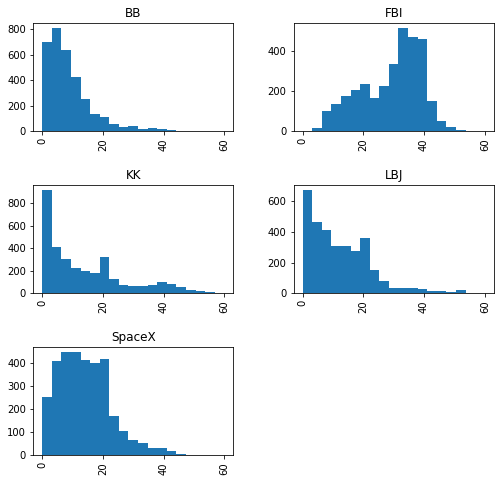

In [43]:
###wordcount behavior
bins = np.linspace(0,60,20)
text['Word_Count'].hist(by=text['Creator'], bins = bins, figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd04d172ac0>,
      dtype=object)

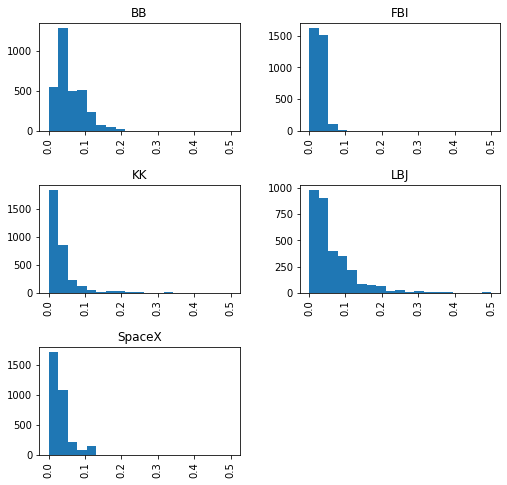

In [44]:
###Punctuation
bins = np.linspace(0,.5,20)
text['Punc_perc'].hist(by=text['Creator'], bins = bins, figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce047460a0>,
      dtype=object)

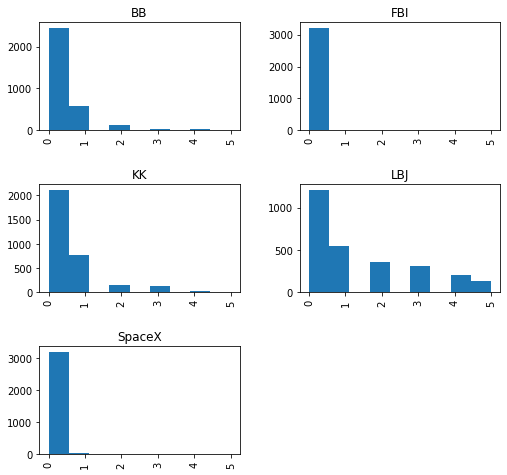

In [45]:
###Emoji
bins = np.linspace(0,5,10)
text['Emoji_count'].hist(by=text['Creator'], bins = bins, figsize=(8,8))



# Combine Features for Model


In [46]:
##### Combine all features, and have output seperate
X = pd.concat([text['Word_Count'], text['Punc_perc'], text['Emoji_count'], bi_X_counts_df, X_counts_df, mention_X_counts_df], axis=1)



### conve
###rt phone(source) into dummy variable as it is categorical
### all features need to be numbers, all categorical need to be converted to binary!!!!
Y = text['Creator']
#### generate over 3000 features
X.shape

(16209, 3235)

In [47]:
# ####Don't add source the first time
Source = pd.get_dummies(combined['source'])
Source

,Hootsuite Inc.,Khoros CX,Khoros Publishing,Periscope,Sprout Social,TweetDeck,Twitter Ads,Twitter Media Studio,Twitter Media Studio - LiveCut,Twitter Web App,Twitter Web Client,Twitter for Advertisers,Twitter for Advertisers.,Twitter for Android,Twitter for Mac,Twitter for iPhone,Vine - Make a Scene,iOS
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
media = pd.get_dummies(combined['media'])
media

,,photo
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
16204,0,1
16205,1,0
16206,0,1
16207,0,1


In [49]:
ext_media = pd.get_dummies(combined['ext_media'])
ext_media

,,animated_gif,photo,"photo, photo","photo, photo, photo","photo, photo, photo, photo",video
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
16204,0,0,1,0,0,0,0
16205,1,0,0,0,0,0,0
16206,0,0,1,0,0,0,0
16207,0,0,1,0,0,0,0


In [50]:
ext_media['photo_comb'] = ext_media['photo'] + ext_media['photo, photo'] + ext_media['photo, photo, photo'] + ext_media['photo, photo, photo, photo']

In [51]:
ext_media = ext_media[['photo_comb', 'animated_gif', 'video']]
ext_media

,photo_comb,animated_gif,video
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
16204,1,0,0
16205,0,0,0
16206,1,0,0
16207,1,0,0


In [52]:
##Don't include Source the first Time

X = pd.concat([X, media['photo'], ext_media], axis=1)


Optional to add on source

In [53]:
#### add on source
X = pd.concat([X, Source], axis=1)

In [54]:
X

,Word_Count,Punc_perc,Emoji_count,_let,abort_test,abuse_material,access_arm,access_shop,across_country,actor_use,...,Twitter Media Studio - LiveCut,Twitter Web App,Twitter Web Client,Twitter for Advertisers,Twitter for Advertisers.,Twitter for Android,Twitter for Mac,Twitter for iPhone,Vine - Make a Scene,iOS
0,18,0.05,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6,0.00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,0.00,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6,0.04,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,19,0.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16205,36,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16206,26,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16207,37,0.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
Y

0        SpaceX
1        SpaceX
2        SpaceX
3        SpaceX
4        SpaceX
          ...  
16204       FBI
16205       FBI
16206       FBI
16207       FBI
16208       FBI
Name: Creator, Length: 16209, dtype: object

# Random Forest

In [56]:
### We will use random forest for this exercise

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
##### measure performance
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_jobs=-1)   ###allows trees build in parallel, run faster
SKFold = StratifiedKFold(n_splits=5)  ###Split data into 5
cross_val_score(rf, X, Y, cv=SKFold, scoring='accuracy', n_jobs=-1)

array([0.9503393 , 0.93676743, 0.96082665, 0.94540407, 0.9102129 ])

In [57]:
### Still do the X Y Training Test Split, start to look at all potential variables we can change for Random Forest

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Play around with n_estimator and max depth
rf = RandomForestClassifier(n_estimators=250, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train, Y_train)

###Look at feature importance
dataset = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_}, columns=['Feature', 'Importance'])
dataset.sort_values(by=['Importance'], ascending=False).head(10)

,Feature,Importance
3254,Twitter for iPhone,0.114482
3240,Khoros CX,0.102640
3239,Hootsuite Inc.,0.049630
2,Emoji_count,0.040370
0,Word_Count,0.039204
3249,Twitter Web Client,0.031534
1,Punc_perc,0.028582
3235,photo,0.022254
2123,launch,0.018036
3236,photo_comb,0.017885


In [58]:
dataset.sort_values(by=['Importance'], ascending=False).head(25)

,Feature,Importance
3254,Twitter for iPhone,0.114482
3240,Khoros CX,0.102640
3239,Hootsuite Inc.,0.049630
2,Emoji_count,0.040370
0,Word_Count,0.039204
3249,Twitter Web Client,0.031534
1,Punc_perc,0.028582
3235,photo,0.022254
2123,launch,0.018036
3236,photo_comb,0.017885


In [59]:
#### Look at confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
Y_pred = rf_model.predict(X_test)

print('Accuracy for this model is:', accuracy_score(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred, target_names = None))


confusion_matrix(Y_test, Y_pred)

#### seems like it was hard to differentiate the 3rd person and 4th person

Accuracy for this model is: 0.9515731030228254
              precision    recall  f1-score   support

          BB       0.99      0.99      0.99       649
         FBI       0.99      0.99      0.99       677
          KK       0.88      0.90      0.89       633
         LBJ       0.90      0.89      0.90       629
      SpaceX       0.99      0.98      0.99       654

    accuracy                           0.95      3242
   macro avg       0.95      0.95      0.95      3242
weighted avg       0.95      0.95      0.95      3242



array([[640,   7,   0,   1,   1],
       [  3, 673,   0,   0,   1],
       [  2,   0, 568,  60,   3],
       [  0,   0,  68, 561,   0],
       [  0,   0,   9,   2, 643]])

In [60]:
result = pd.DataFrame({'actual': Y_test, 'prediction': Y_pred})
result[(result['actual']!=result['prediction']) & (result['actual'] == 'BB')]

,actual,prediction
8846,BB,FBI
7238,BB,FBI
8263,BB,FBI
9045,BB,FBI
9529,BB,FBI
7750,BB,SpaceX
8478,BB,FBI
8619,BB,FBI
6916,BB,LBJ


In [61]:
combined['text'].iloc[9151]

"We need more Latinx voices at the table of tech. That's why we've committed $44 million to diversity, community and inclusion efforts. We're extending la mesa—pull up a chair. More representation. More seats at the table. #Moreofthis #LatinxHeritageMonth"

Test out a different set of features

In [62]:
X2 = X.drop(['Word_Count'], axis=1)

In [63]:
### Still do the X Y Training Test Split, start to look at all potential variables we can change for Random Forest
##we will try X2 this time
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)

### Play around with n_estimator and max depth
rf = RandomForestClassifier(n_estimators=250, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train, Y_train)

###Look at feature importance
dataset = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_}, columns=['Feature', 'Importance'])
dataset.sort_values(by=['Importance'], ascending=False).head(10)

,Feature,Importance
3253,Twitter for iPhone,0.117919
3239,Khoros CX,0.103785
3238,Hootsuite Inc.,0.051996
1,Emoji_count,0.045431
0,Punc_perc,0.031512
3248,Twitter Web Client,0.031463
3234,photo,0.024561
3235,photo_comb,0.017386
2122,launch,0.017371
1743,falcon,0.015396


In [64]:
#### Look at confusion matrix 
Y_pred = rf_model.predict(X_test)

print('Accuracy for this model is:', accuracy_score(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred, target_names = None))


confusion_matrix(Y_test, Y_pred)



Accuracy for this model is: 0.958975940777298
              precision    recall  f1-score   support

          BB       0.99      1.00      0.99       628
         FBI       1.00      0.99      0.99       636
          KK       0.91      0.91      0.91       676
         LBJ       0.91      0.91      0.91       637
      SpaceX       0.99      0.99      0.99       665

    accuracy                           0.96      3242
   macro avg       0.96      0.96      0.96      3242
weighted avg       0.96      0.96      0.96      3242



array([[625,   1,   0,   0,   2],
       [  2, 630,   1,   0,   3],
       [  2,   0, 616,  55,   3],
       [  0,   0,  55, 582,   0],
       [  1,   2,   5,   1, 656]])

In [65]:
result = pd.DataFrame({'actual': Y_test, 'prediction': Y_pred})
result[result['actual']!=result['prediction']]

,actual,prediction
6281,LBJ,KK
12862,KK,LBJ
10879,KK,LBJ
10977,KK,LBJ
3962,LBJ,KK
...,...,...
13309,FBI,BB
1027,SpaceX,KK
3558,LBJ,KK
11015,KK,LBJ


In [66]:
combined['text'].iloc[12285]

'RT @skims: As a special thank you to our community, we’re gifting our signature Waist Trainer to the first 1,000 customers who shop the mor…'

Skip this part in class as it takes too long to find best param, please do run at home

# HW4

0. Make sure you run all the steps before, do not include "Source" as one of your features

In [67]:
combined.columns

Index(['id', 'text', 'date', 'hashtags', 'rt_count', 'media', 'ext_media',
       'place', 'lang', 'fav_count', 'source', 'Creator', 'hour', 'RT',
       'Mention'],
      dtype='object')

In [68]:
combined.drop(columns=['source'], inplace=True)

1. Pull tweets from the the 5 handles above, please only keep records after 4/18/2022, feel free to use Tweet_Pull.ipynb to grab tweets, or building up a quick table on your own with excel

In [69]:
Sample = pickle.load(open(data_dir+"/combined.sav", "rb" ))

In [70]:
Sample.drop(columns=['source'], inplace=True)

In [71]:
Sample = Sample[Sample.date > '2022-04-18']

2. Combine the 5 dataframe together similar to class exercise, run them through text cleaning steps and feature selection steps and generate X, Y for ML. 
Hint: When you use count_vect, instead of fit and transform, you will be using original vocab instead and not extract new word, so only use transform function...See example below
Hint 2: You need to do 
Please make sure you use the version that does not contain source of tweet (iphone vs. android vs. other platform)

In [72]:
Sample['hour'] = Sample.date.dt.hour

In [73]:
Sample['RT'] = Sample['text'].apply(rtCheck)


In [74]:
Sample.head(2)

,id,text,date,hashtags,rt_count,media,ext_media,place,lang,fav_count,Creator,hour,RT
0,1519432754563231744,Watch Dragon and the Crew-4 astronauts dock with the @space_station → https://t.co/X7abHvGtMp https://t.co/d6l9cjPCgl,2022-04-27 21:46:13+00:00,,459,,,None,en,2202,SpaceX,21,False
1,1519417772819636225,"RT @NASA: Roads? Where they're going, they don't need roads. Check in LIVE with the astronauts of #Crew4 and see inside their @SpaceX Drago…",2022-04-27 20:46:41+00:00,Crew4,403,,,None,en,0,SpaceX,20,True


In [77]:
Sample['Mention'] = Sample['text'].apply(mention_func)

# Text cleaning

In [79]:
text_sample = Sample[['id','Creator', 'text']]
text_sample['noHWA_text'] = text_sample['text'].apply(removeHWA)
text_sample['remove_Punc'] = text_sample['noHWA_text'].apply(remove_punc)
text_sample['Lem_Token'] = text_sample['remove_Punc'].apply(lemmatize_sentence)
text_sample['no_stopword'] = text_sample['Lem_Token'].apply(remove_stopwords)

### You may do bigram based on no_stopword, lem_token or stem token
text_sample['Bigram'] = text_sample['no_stopword'].apply(Bigram)

###Reset Index
text_sample.reset_index(drop=True, inplace=True)

<ipython-input-79-58cb2b70ba2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_sample['noHWA_text'] = text_sample['text'].apply(removeHWA)
<ipython-input-79-58cb2b70ba2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_sample['remove_Punc'] = text_sample['noHWA_text'].apply(remove_punc)
<ipython-input-79-58cb2b70ba2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [86]:
text_sample['Word_Count'] = text_sample['noHWA_text'].apply(lambda x: len(x.split()))


<ipython-input-86-df92f6b79d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_sample['Word_Count'] = text_sample['noHWA_text'].apply(lambda x: len(x.split()))


In [83]:
text_sample['Punc_perc'] = text_sample['noHWA_text'].apply(lambda x: count_punct(x))


<ipython-input-83-4d11a70f2999>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_sample['Punc_perc'] = text_sample['noHWA_text'].apply(lambda x: count_punct(x))


In [84]:
text_sample['Emoji_count'] = text_sample['noHWA_text'].apply(count_emoji)


<ipython-input-41-b2d3d67e33a0>:4: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  em_split_emoji = emoji.get_emoji_regexp()
<ipython-input-84-e04445d4ba31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_sample['Emoji_count'] = text_sample['noHWA_text'].apply(count_emoji)


In [85]:
X = pd.concat([text_sample['Word_Count'], text_sample['Punc_perc'], text_sample['Emoji_count'], bi_X_counts_df, X_counts_df, mention_X_counts_df], axis=1)


KeyError: 'Word_Count'

In [81]:
###leverage the vocab list already created with this exercise
vocab = count_vect.vocabulary_
##Leverage vectorize that was built earlier with non Number terms
X_counts_sample = count_vect.transform(text_sample['Lem_Token'])
X_counts_df_sample = pd.DataFrame(X_counts_sample.toarray())
X_counts_df_sample



,0,1,2,3,4,5,6,7,8,9,...,11204,11205,11206,11207,11208,11209,11210,11211,11212,11213
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
####Show column names with actual words
X_counts_df_sample.columns = count_vect.get_feature_names()
X_counts_df_sample.head(2)

,aaaaaaa,aaahhhhhhhhh,aaliyah,aapi,aaron,ab,abandon,abbate,abbett,abc,...,эффективным,является,әɘɘʞ,ⴇauϙƨ,五名人士为中国秘密警察跟踪,搜集美国居民情报遭多项指控,骚扰,𝐋𝐢𝐧𝐤,𝐛𝐢𝐨,𝐢𝐧
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_counts_df_sample = X_counts_df_sample.drop([col for col, val in X_counts_df_sample.sum().iteritems() if val < 10], axis=1)

In [89]:
bi_count_vect_sample = CountVectorizer()
bi_X_counts_sample = bi_count_vect.fit_transform(text_sample['Bigram'])

In [90]:
bi_X_counts_df_sample = pd.DataFrame(bi_X_counts_sample.toarray())
bi_X_counts_df_sample.columns = bi_count_vect_sample.get_feature_names()

In [ ]:
bi_X_counts_df_sample = bi_X_counts_df_sample.drop([col for col, val in bi_X_counts_df_sample.sum().iteritems() if val < 10], axis=1)
droplist_sample = [i for i in bi_X_counts_df_sample.columns if "_" not in i]
bi_X_counts_df_sample = bi_X_counts_df_sample.drop(droplist,axis=1)

3. Once you have proper X and Y, load them in to random forecast that was built through class exercise, note that you don't need to rebuild the model, just use prediction function

In [ ]:
####Y_pred = rf_model.predict(X_test)

4. Leverage sample code to get accuracy, confusion matrix, and sample check couple mismatch items

5. In your own word, describe how accurate our prediction model is